In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("./chennai_house_price_prediction.csv")

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [6]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [46]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [37]:
def func(*imp):
    sum = 0
    for i in imp:
        sum = sum + i
    return sum/3    

In [38]:
for i in range(len(df)):
    if df.loc[i,'QS_OVERALL'] == "NaN":
        df.loc[i,'QS_OVERALL'] = func(df.loc[i,'QS_BEDROOM'],df.loc[i,'QS_ROOMS'],df.loc[i,'QS_BEDROOM'])

In [56]:
df['D'].unique().sum()

20100

In [45]:
df.dropna(inplace = True)


In [60]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

## N_BEDROOM N_BATHROOM N_ROOM  needs to be changed to objects

In [59]:
df = df.astype({"N_BEDROOM":"object","N_BATHROOM":"object","N_ROOM":"object"})

In [61]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

# UNIVARIATE ANALYSIS

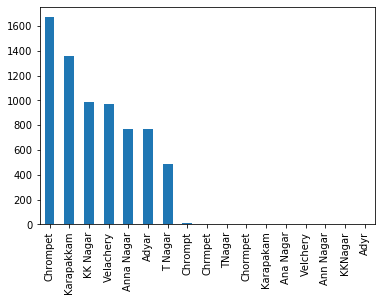

In [70]:
df['AREA'].value_counts().plot.bar()

## NEED TO CORRECT SPELLINGS

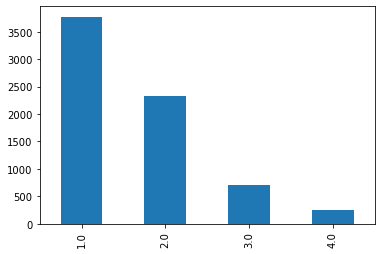

In [74]:
df['N_BEDROOM'].value_counts().plot.bar()

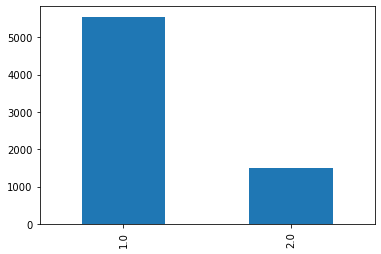

In [76]:
df['N_BATHROOM'].value_counts().plot.bar()

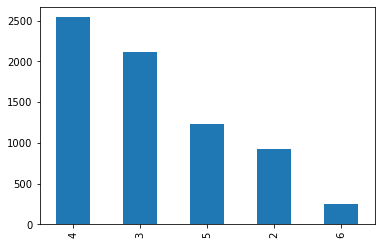

In [77]:
df['N_ROOM'].value_counts().plot.bar()

In [104]:
for i in ['STREET','UTILITY_AVAIL','BUILDTYPE','PARK_FACIL','AREA']:
    print("********VALUE COUNTS OF",i,"********")
    print(df[i].value_counts(),"\n\n")


********VALUE COUNTS OF STREET ********
Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64 


********VALUE COUNTS OF UTILITY_AVAIL ********
AllPub     1875
NoSeWa     1860
NoSeWa     1812
ELO        1509
Name: UTILITY_AVAIL, dtype: int64 


********VALUE COUNTS OF BUILDTYPE ********
House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64 


********VALUE COUNTS OF PARK_FACIL ********
Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64 


********VALUE COUNTS OF AREA ********
Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64 




## SPELLING OF THESE

 - `STREET`
 - `UTILITY_AVAIL` 
 - `BUILDTYPE` 
 - `PARK_FACILITY` 
 - `AREA`

In [96]:
df.replace({"Pavd":"Paved","NoAccess":"No Access","All Pub":"AllPub","NoSewr":"NoSeWa","Other":"Others","Comercial":"Commercial","Noo":"No"},inplace = True)

In [103]:
df.replace({"Adyr":"Adyar","KKNagar":"KK Nagar","Ann Nagar":"Anna Nagar","Velchery":"Velachery","Ana Nagar":"Anna Nagar", "Karapakam":"Karapakkam","Chormpet":"Chrompet","TNagar":"T Nagar","Chrmpet":"Chrompet","Chrompt":"Chrompet"},inplace = True)

# BIVARIATE ANALYSIS

In [105]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

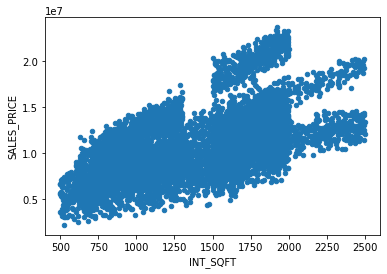

In [106]:
df.plot.scatter(x = "INT_SQFT",y = "SALES_PRICE")

# SPLIT TRAIN TEST BABBYYYY

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn. import m